# pytorch 예제

In [87]:
import torch 
import torchvision
import torch.nn as nn
import numpy as np
import torchvision.transforms as transforms
from torch.autograd import Variable

In [88]:
x = torch.tensor(1., requires_grad=True)
w = torch.tensor(2., requires_grad=True)
b = torch.tensor(3., requires_grad=True)

In [89]:
# Build a computational graph.
y = w * x + b    # y = 2 * x + 3

In [90]:
# Compute gradients.
y.backward()

In [91]:
# Print out the gradients.
print(x.grad)    # x.grad = 2 
print(w.grad)    # w.grad = 1 
print(b.grad)    # b.grad = 1 

tensor(2.)
tensor(1.)
tensor(1.)


In [73]:
# Create tensors of shape (10, 3) and (10, 2).
x = torch.randn(10, 3)
y = torch.randn(10, 2)

In [74]:
# Build a fully connected layer.
linear = nn.Linear(3, 2)
print ('w: ', linear.weight)
print ('b: ', linear.bias)

w:  Parameter containing:
tensor([[-0.3966,  0.0474,  0.2057],
        [-0.2605, -0.1229, -0.2295]], requires_grad=True)
b:  Parameter containing:
tensor([ 0.2230, -0.4970], requires_grad=True)


In [75]:
# Build loss function and optimizer.
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(linear.parameters(), lr=0.01)

In [76]:
# Forward pass.
pred = linear(x)

In [86]:
# Forward pass.
for i in range(100):
    pred = linear(Variable(x))
    
    #compute loss.
    loss = criterion(pred, y)
    loss.backward()
    
    # Print out the gradients.
    print ('dL/dw: ', linear.weight.grad) 
    print ('dL/db: ', linear.bias.grad)
    
    # 1-step gradient descent.
    optimizer.step()

dL/dw:  tensor([[-1.6080, -0.0357,  2.3119],
        [-0.1782,  1.2184, -2.1049]])
dL/db:  tensor([0.7915, 0.0525])
dL/dw:  tensor([[-2.3513, -0.0663,  3.3898],
        [-0.2765,  1.8054, -3.1115]])
dL/db:  tensor([1.1547, 0.0976])
dL/dw:  tensor([[-3.0239, -0.1117,  4.3763],
        [-0.3853,  2.3658, -4.0643]])
dL/db:  tensor([1.4797, 0.1645])
dL/dw:  tensor([[-3.6055, -0.1756,  5.2451],
        [-0.5072,  2.8916, -4.9472]])
dL/db:  tensor([1.7555, 0.2596])
dL/dw:  tensor([[-4.0789, -0.2611,  5.9732],
        [-0.6444,  3.3750, -5.7457]])
dL/db:  tensor([1.9725, 0.3884])
dL/dw:  tensor([[-4.4299, -0.3701,  6.5414],
        [-0.7978,  3.8086, -6.4472]])
dL/db:  tensor([2.1226, 0.5552])
dL/dw:  tensor([[-4.6482, -0.5035,  6.9352],
        [-0.9680,  4.1861, -7.0412]])
dL/db:  tensor([2.1996, 0.7634])
dL/dw:  tensor([[-4.7276, -0.6610,  7.1447],
        [-1.1542,  4.5016, -7.5197]])
dL/db:  tensor([2.1995, 1.0150])
dL/dw:  tensor([[-4.6662, -0.8410,  7.1656],
        [-1.3547,  4.7503, 

In [77]:
# Compute loss.
loss = criterion(pred, y)
print('loss:', loss.item())

loss: 1.6111488342285156


In [78]:
# Backward pass.
loss.backward()

In [79]:
# Print out the gradients.
print ('dL/dw: ', linear.weight.grad) 
print ('dL/db: ', linear.bias.grad)

dL/dw:  tensor([[-0.8163, -0.0152,  1.1718],
        [-0.0872,  0.6137, -1.0617]])
dL/db:  tensor([0.4024, 0.0225])


In [80]:
# 1-step gradient descent.
optimizer.step()

In [81]:
# You can also perform gradient descent at the low level.
# linear.weight.data.sub_(0.01 * linear.weight.grad.data)
# linear.bias.data.sub_(0.01 * linear.bias.grad.data)

# Print out the loss after 1-step gradient descent.
pred = linear(x)
loss = criterion(pred, y)
print('loss after 1 step optimization: ', loss.item())

loss after 1 step optimization:  1.5744489431381226


In [82]:
####################### Loading data from numpy
x_np = np.array([[1,2], [3,4]])
x_t = torch.from_numpy(x_np)

## regression

In [115]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [116]:
# Toy dataset
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

In [117]:
x_train.shape, y_train.shape

((15, 1), (15, 1))

In [270]:
# Hyper-parameters - 사용자가 임의로 주는 파라미터
input_size = 1
output_size = 1
num_epochs = 60       # 60번 진행
learning_rate = 0.001 # gradient 비율을 0.001로 하려고?

In [271]:
model = nn.Linear(input_size, output_size)

In [272]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

In [273]:
for epoch in range(num_epochs):
    # Convert numpy arrays to torch tensors
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)

    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 5 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

Epoch [5/60], Loss: 0.9837
Epoch [10/60], Loss: 0.5014
Epoch [15/60], Loss: 0.3060
Epoch [20/60], Loss: 0.2268
Epoch [25/60], Loss: 0.1947
Epoch [30/60], Loss: 0.1817
Epoch [35/60], Loss: 0.1764
Epoch [40/60], Loss: 0.1743
Epoch [45/60], Loss: 0.1734
Epoch [50/60], Loss: 0.1731
Epoch [55/60], Loss: 0.1729
Epoch [60/60], Loss: 0.1728


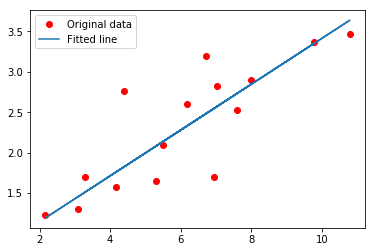

In [274]:
# Plot the graph
predicted = model(torch.from_numpy(x_train)).detach().numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()

model_path = '/home/cyc/deep_learning'
torch.save(model.state_dict(), 'model.ckpt')

In [ ]:
model_path = '/home/cyc/deep_learning/abe.'
torch.save(model.state_dict(), model_path) # 모델에서 parameter만 저장하면 용량도 절약되고 좋다.

## nnmodel

In [275]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

In [284]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

torch.cuda.is_available() # gpu가 사용가능한지 확인하는 메소드, True을 경우 사용가능하다.

True

In [277]:
# Hyper-parameters 
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 5
batch_size = 100      # 100개를 뽑겠다.
learning_rate = 0.001 # 나의 판단으로 0.001을 준다.

In [278]:
# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='../../data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)
test_dataset = torchvision.datasets.MNIST(root='../../data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

In [279]:
# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

In [280]:
# Fully connected neural network with one hidden layer
# linear/선형변환을 일일히 해주기 싫어서 클래스를 만들어서 한번에 선형변환을 하는 듯 하다.
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU() # activation function is relu
        self.fc2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out
    
model = NeuralNet(input_size, hidden_size, num_classes).to(device)

In [281]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss() # CrossEntropyLoss is negative likelihood
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # Move tensors to the configured device
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))


Epoch [1/5], Step [100/600], Loss: 0.2593
Epoch [1/5], Step [200/600], Loss: 0.1414
Epoch [1/5], Step [300/600], Loss: 0.1621
Epoch [1/5], Step [400/600], Loss: 0.2505
Epoch [1/5], Step [500/600], Loss: 0.1886
Epoch [1/5], Step [600/600], Loss: 0.1631
Epoch [2/5], Step [100/600], Loss: 0.2700
Epoch [2/5], Step [200/600], Loss: 0.0847
Epoch [2/5], Step [300/600], Loss: 0.0988
Epoch [2/5], Step [400/600], Loss: 0.1434
Epoch [2/5], Step [500/600], Loss: 0.1084
Epoch [2/5], Step [600/600], Loss: 0.1094
Epoch [3/5], Step [100/600], Loss: 0.0391
Epoch [3/5], Step [200/600], Loss: 0.0320
Epoch [3/5], Step [300/600], Loss: 0.0641
Epoch [3/5], Step [400/600], Loss: 0.0606
Epoch [3/5], Step [500/600], Loss: 0.0707
Epoch [3/5], Step [600/600], Loss: 0.0578
Epoch [4/5], Step [100/600], Loss: 0.0737
Epoch [4/5], Step [200/600], Loss: 0.0894
Epoch [4/5], Step [300/600], Loss: 0.0686
Epoch [4/5], Step [400/600], Loss: 0.0239
Epoch [4/5], Step [500/600], Loss: 0.0717
Epoch [4/5], Step [600/600], Loss:

In [282]:
# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))

# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')

Accuracy of the network on the 10000 test images: 98.04 %
